In [3]:
%matplotlib inline

In [59]:
import numpy as np
import pandas as pd
import random
import time
import os
from IPython.display import display
import matplotlib.pyplot as plt

# Comparative Study of Dynamic Programming and Genetic Algorithms for the Solution of 0/1 Knapsack Problem

### Author Ivan Georgiev

## Abstract 

The 0/1 Knapsack Problem involves selecting a subset of items, each with a given weight and value, to maximize total value without exceeding a capacity limit. In this project, we analyze two distinct solution approaches: Dynamic Programming (DP), which guarantees an optimal result, and Genetic Algorithms (GA), a heuristic approach inspired by natural evolution. Our main goal is to evaluate their performance and present a comparative study in terms of runtime and solution quality across varying problem sizes. Our experiments reveal that DP excels on smaller instances due to its precision, while GA offers greater scalability for larger instances at the expense of guaranteed optimality. These findings are consistent with previous work done on 0/1 Knapsack solutions. Our results highlight the trade-offs between exact and approximate methods, providing insights when a fast, heuristic GA is preferable to the exact but more computationally intensive DP approach.

*The 0/1 Knapsack Problem, involves selecting a subset of items with given weights and values to maximize total value without exceeding a capacity limit. In this project we will analyze two distinct approaches to solving this challange: Dynamic Programming (DP), which guarantees an optimal solution, and Genetic Algorithms (GA), a heuristic method inspired by natural evolution. Our main goal is to evaluate their performance and to present a comparative study in terms of runtime and solution quality across varying problem sizes. Our experiments reveal that DP excels in smaller instances with its precision, while GA offers scalability for larger instances at the cost of optimality. These findings are consistent with the prevuious work done on 0/1 Knapsack Problem solutions. Our results also highlight the trade-offs between exact and approximate methods, providing insights when a fast, heuristic GA is preferable to the exact but more computationally intensive DP approach.*
*The existing body of research strongly supports our initial hypothesis. The consistent findings across various studies provide a solid foundation for our experimental design and analysis proposed. The recurring theme in the literature highlights the expected strengths of DP for smaller problem instances as well as the potential of GA to provide efficient, high-quality solutions for larger instances where DP becomes less practical due to its computational demands. 

*Along the way we will discuss the mathematics behind our code and suggest little tests here and there to see if what we have implemented up to that point works as expected. We will be trying to explain our thought process and provide examples to elucidate the ideas being discussed. An attempt is made to cover everything in such a way that minimal prior knowledge would be required to follow and and replicate our results. Once we have something simple that works we will discuss possible improvements and try to implement some ot them.*

*At the end of this presentation we will briefly discuss algorithmic complexity of both ray tracing in general and the implementation we create.*

## 1.Introduction 

The **0/1 Knapsack Problem** is a classic challenge in combinatorial optimization. Given $n$ items, each with a weight $w_i$ and value $v_i$, the goal is to select a subset of items that fits within a total weight capacity $W$ while maximizing total value. The “0/1” constraint means each item is either included or excluded and no partial selections is allowed. This problem has both theoretical significance and practical impact. Applications range from budget allocation under financial constraints to load planning in logistics and resource distribution in project management. Because of its wide-ranging relevance, efficient solution methods have been the subject of extensive research.
**Dynamic Programming (DP)** provides an exact solution, leveraging the problem’s optimal substructure to compute the best subset in $O(nW)$ time, where $𝑛$ is the number of items and $𝑊$ is the capacity. However, this pseudo-polynomial complexity can become impractical for large $n$ or $W$ and can lead to computational inefficiencies when the number of items or the knapsack capacity become too large.
In contrast, **Genetic Algorithms (GAs)**, inspired by natural evolution, offer a heuristic alternative. By evolving populations of solutions through selection, crossover, and mutation, GAs often deliver near-optimal results faster, though they do not guarantee optimality and may require careful tuning of parameters. 
### 1.1 0/1 Knapsack Problem Definition 
Given $n$ items, where each item $i$ has a positive integer weight $w_i \in \mathbb{Z}$ and value $v_i \in \mathbb{Z}$, and a knapsack with capacity $W \in \mathbb{Z}$, the goal is to select a subset of items that maximizes total value, while keeping the total weight at or below $W$. Each item is either included or excluded (no fractional selections).

Binary decision variables definition: 
$$ x_i = \begin{cases} 1, & \text{if we include item }i,\\ 0, &\text{otherwise}\end{cases} $$

The optimization problem is: 

\begin{align*}
\max\;           & \sum_{i=1}^n v_i\,x_i            && (\text{maximize total value})\\
\text{subject to}\; & \sum_{i=1}^n w_i\,x_i \le W    && (\text{capacity constraint})\\
                  & x_i \in \{0,1\}, \; i=1,\dots,n.
\end{align*}

The capacity constraint $$\sum_{i=1}^{n} w_i x_i \leq W$$ ensures the total weight does not exceed the knapsack’s capacity, and the binary variables $x_i$ enforce the all-or-nothing selection rule.

**Example**: Let's consider 3 items with weights $w_1 = 2$, $w_2 = 3$, $w_3 = 4$, values $v_1 = 3$, $v_2 = 4$, $v_3 = 5$, and capacity $W = 5$. A valid solution is to select item 2 $( x_2 = 1 ), ( x_1 = x_3 = 0 )$, yielding total weight $ 3 \leq 5 $ and value $4$. Another solution, selecting items 1 and 2 $( x_1 = x_2 = 1 ), ( x_3 = 0 )$, gives weight $2 + 3 = 5 \leq 5$ and value $ 3 + 4 = 7 $. The optimal solution must maximize value while respecting the weight constraint.

This problem is NP-hard, with its decision version is NP-complete. Exact solutions, like Dynamic Programming, require pseudo-polynomial time, while heuristic approaches, like Genetic Algorithms, offer faster but approximate solutions for large instances.
### 1.2 Previous Work Preview 
Over the last two decade, numerous studies have been complited on comparing different approaches to solve 0/1 Knapsasck Problem[1]. The studies reveal that the two best approximation approaches for solving the problem are **GAs** and **DP**[2]. The studies of the two methods shows a consistent pattern in which **GAs** have proven to be powerful heuristics algorithm that scale to hard instances and produce near-optimal solutions fast, while **DP** remains an invaluable exact solver for smaller instances or verification. The choice between them depends on problem size, time and resources available, and how critical finding the absolute optimum is and is a trade-off between optimality and efficiency. 
#### 1.1.1 Runtime Performance 
One fundamental difference between **DP** and **GAs** is their computational complexity. A typical **DP** for 0/1 Knapsack problem runs in pseudo-polynomial time $O(n·W)$ (where $n$ is number of items and $W$ the capacity). In the worst case (when $W$ is large relative to item weights), this can be exponential in the input size. By contrast, a **GA** does not enumerate all weight states; its runtime is roughly $O(n · G)$ (linear in problem size per generation). If the population size and generations are bounded, GAs often run in near-linear time overal. Exact **DP** algorithms tend to slow down substantially as problem size increases, whereas **GAs** scale more gracefully. In summary, GAs generally offer dramatically lower runtime for large-scale knapsack problems, whereas DP guarantees optimality at the cost of higher computation time.
#### 1.1.2 Solution Accuracy
The trade-off for **GAs’** speed is related to the fact that GA provide approximate solutions. Dynamic programming is an exact method, always yielding the global optimal knapsack value. By contrast, **GA** is a stochastic heuristic and does not guarantee the optimal solution. The quality of GA solutions depends on factors like population diversity, number of generations, and genetic operators. In practice, however, well-tuned GAs often achieve near-optimal results for knapsack instances. Many comparative studies measure how close a GA’s best solution is to the optimal obtained by DP or other exact methods. Over the past decade, results consistently show GAs can reach 90–100% of the optimal value on average, especially with sufficient iteration. 

*For example, Shaheen & Sleit found that while greedy heuristics and GAs both sometimes fall short of the true optimum, the GA’s “local optimal result is better” than a greedy algorithm’s in most case. In several cas studies, the GA even found the exact optimal solution, matching the DP result.This aligns with other reports that genetic algorithms can produce high-quality solutions for knapsack; for instance, a GA can often find 99%+ of the optimal value given enough generations.*

In summary, **DP** guarantees 100% optimal knapsack value, while **GAs** usually achieve near-optimal values (95–100% of optimum) with far less computation. The last decade of experiments confirms that a properly configured **GA** can yield solutions of impressive quality for 0/1 Knapsack Problem, although small deviations from the optimal value can occur if the GA converges prematurely or has insufficient diversity.

### 1.2 General Principles of Dynamic Programming Algorithm  
**Dynamic Programming (DP)** is a powerful algorithmic paradigm for solving complex problems by breaking them to simpler, overlapping subproblems. It relies on two fundamental principles:
- Optimal Substructure. An optimal solution to the overall problem can be composed from optimal solutions to its subproblems.
- Overlapping Subproblems. The complex problem subproblems recur many times, so we can gain efficiency by solving each subproblem only once and storing its result in a table.
  
DP can be implemented in two main ways:
- Top-down approach (memoization), in which w write a recursive formulation of the valueor the function, and store each computed result to avoid redundant work.
- Bottom-up approach (tabulation), in which we identify an ordering of subproblems by size or index and fill in a 2D table iteratively.

The term Dynamic Programming was used first in the 1950's by Richard Bellman who formulated the Bellman Principle of Optimality and Bellman recurrence[3]. Bellman's Principle of Optimality states that an optimal policy has the property that, whatever the initial state and decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision.
#### 1.2.1 DP Knapsack Algorithm
In our study, we will focus on Dymanic Programming solution to 0/1 Knapsack Problem using a bottom-up approach. In that approach a 2D table, often denoted as $\mathrm{DP}[i][w]$ of size $\mathrm(n+1)×(W+1)$ is constructed. 
$$\begin{equation}\mathrm{DP}[i][w]= \max\bigl\{\text{total value using items in }\{1,\dots,i\}\text{ with capacity }w\bigr\},\quad0 \le i \le n,\;
0 \le w \le W.\end{equation}$$

The rows of the table represent the number of items considered (from 0 to $n$), and the columns represent the knapsack capacity (from 0 to $W$).  The table is filled iteratively, starting from the base cases where no items are considered $$\mathrm{DP}[0][w] = 0 \quad \forall\,0 \le w \le W,
\qquad
\mathrm{DP}[i][0] = 0 \quad \forall\,0 \le i \le n,$$ 
since with no items (or zero capacity) the maximum value is zero.

We then fill the table row by row. For each item $i$ (with weigth $w_i$ and value $v_i$) and each capacity $w$ we choose between two options: 

- We do not take item $i$, and keep the previous optimum value $\mathrm{DP}[i-1][w]$ (the optimum without this item).

- We take item $i$ (of weight $w_i$ and value $v_i$), then we gain its value $v_i$ plus whatever the best we can do with remaining capacity $w-w_i$ using previous items, which is $\mathrm{DP}[i-1][w-w-1]$. This is only feasible if $w_i \le w$.

So, in $1 \le i \le n,\quad 0 \le w \le W$ we have the following two DP transitions: 
$$ DP[i][w] =
\begin{cases}
\max\bigl(DP[i-1][w],\,DP[i-1][w-w_i] + v_i\bigr), & w_i \le w,\\
DP[i-1][w], & w_i > w.
\end{cases} $$  

After filling all rows, the optimal value for capacity $𝑊$ using all $n$ items is found at $$ DP[n][W]$$.

After we fill the entire DP table and find out that the $DP=[n][W]$ is the maximum achivable value, we can recover which items produced that value by walking backwards through the table. Staritn from $(i,w)=(n,W)$ we compare each entry $\mathrm{DP}[i][w]$ to $\mathrm{DP}[i-1][w]$ to decide if the item $i$ contributed to the optimum and adjust $i$ and $w$ accordinglly until we reach $i = 0$.

Let
$$ S = \varnothing,\quad i = n,\quad w = W.$$
While $i>0$ we compare $$\mathrm{DP}[i][w]\text vs. \mathrm{DP}[i-1][w]$$ 
$$\begin{aligned} \text{if }DP[i][w] &= DP[i-1][w], &\quad &\text {we do not take }i&\quad \text {then }i \leftarrow i-1,\\
\text{else (i.e.\ }DP[i][w] &= DP[i-1][w - w_i] + v_i), &\quad &\text{we take }i\quad \text{then }
    \begin{cases}
      S \leftarrow S \cup \{i\},\\
      w \leftarrow w - w_i,\\
      i \leftarrow i-1.
    \end{cases}
\end{aligned}$$

When the loop ends 
$$S = \{\,i_1,\,i_2,\,\dots,\,i_k\}.$$
is the exact set of items whose total weigth $ \sum_{j \in S} w_j \;\le\; W,$ and total value $\sum_{j \in S} v_j \;=\; DP[n][W].$
#### 1.2.2 Pseudo-Polynomial Nature
Because the time complexity is $O(nW)$, which is polynomial in $n$ and in the numeric value of $W$ (rather than in the length of its binary encoding), the algorithm becomes infeasible when $W$ is large. 

### 1.3 General Principles of Genetic Algorithm 
A **Genetic Algorithm (GA)** is a stochastic, population-based optimization method inspired by the nature. By using selection, croos-over and mutation, **GA** efficiantlly find near-optimal solutions for large or complex search spaces, when the exact methods are infeasible. 
A GA starts with a initializagtion of population of candidate solutions (individuals), each represented as a chromosome (e.g., a string of bits, numbers, or symbols). These solutions evolve over generations to optimize a fitness function $f(x)$ which quantifies how good a solution is. 
#### 1.3.1 Key Steps and Workflow
1. Initialization - generate an initial population of $N$ candidate solutions, each encoded as a chromozome.
2. Evaluation - compute a fitness function $f(x)$ for a every individual according to a problem-specific criterion (higher is better)
3. Selection - choose parent individials probabilistically favoring higher fittnes, to form a mating pool. 
4. Crossover(recombination) - pair parents and exchange genetic materials to produce offspring wiht probability $p_c$. 
5. Mutation - introduce random perturbations to offspring genes with probality $p_m$, preserving diversity and avoiding local optima. 
6. Replacement - form a new generation by selecting among parents and offspring (e.g. full replacement, elitist retention). 
7. Termination - repeat steps 2-6 until a stopping criterion is met (e.g. maximum generations, target fitness, or time budget).   
#### 1.3.2 Population Initialization
During that step a population of size $𝑁$ is initialized, where each individual $x_i$ $(i = 1,2,\dots,N)$ is a candidate solution.
Initialization is typically random within a defined search space and chromosomes are often encoded as:
   - Binary strings (e.g. $x_i = [0,1,1,0]$)
   - Real numbers (e.g. $x_i = [3.14, 2.71]$)
#### 1.3.4 Fitness Function
- The fitness function $f(x_i)$ evaluates the quality of the individual $ x_i $.
- For maximization problems, higher $ f(x_i) $ indicates a better solution.
- For minimization problems, transform the objective, e.g., $f(x_i) = \frac{1}{1 + g(x_i)}$, where $ g(x_i) $ is the cost function.
  - Example: If optimizing $g(x)=x^2$, the fitness might be $ f(x)\frac{1}{1+x^2}$.
#### 1.3.5 Selection
Selection chooses individuals for reproduction based on their fitness. Candidates are selected for reproduction based on their fitness, favoring those with higher fitness resembling the natural evolution principle of "survival of the fittest".

There are few common selection methods:
  - Fitness Proportionate Selection (Roulette Wheel):
     - Probability of selecting the individual $ x_i$
        $$ P(x_i) = \sum_{j=1}^N \frac {f(x_j)}{fx_i}$$ 
     - To spin the wheel a cumulative probability is used.
  - Tournament Selection - we use tournament selection, where a few random individuals compete and the one with the highest fitness wins the chance      to reproduce
    - Randomly pick $ k $ individuals and select the one with the highest fitness
    - Probability depends on fitness rankings
  - Rank-Based Selection
    - Assign selection probabilities based on fitness rank rather than row fitness values.
#### 1.3.6 Crossover (Recombination) 
Crossover combines the genetic materials of two parents to produce offspring. Also known as recombination, crossover takes two parent solutions and combines them to produce one or two offspring. The idea is to mix genetic information from two good solutions, hoping to create an even better solution. Crossover is typically applied with a certain probability (crossover rate); if no crossover occurs, offspring are just copies of the parents.
- From two parents $ x_1 $ and $ x_2 $ crossover occurs with probability $ p_c $ (typically 0.6-0.9).
- Common crossover methods:
  - Single-Point Crossover - a random cut point is chosen in the chromosome string, and the prefix of Parent A is combined with the suffix of Parent B to form one child, while the complementary pieces form the second child
    - Choose a random point $ k $ in the chromosome (length $L$).
    - Swap genes after $k$:
      $$ x_1 = [a_1, a_2, \dots, a_k, a_{k+1}, \dots, a_L], \quad x_2 = [b_1, b_2, \dots, b_k, b_{k+1}, \dots, b_L $$
      $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
  - Uniform Crossover
    - For each gene swap parent genes with probability of 0.5
  - Arithmetic Crossover
    - Offspring are linear combinations 
     $$ \text {Offspring}_1 = [\,a_1, \dots, a_k,\, b_{k+1}, \dots, b_L\,], \quad \mathrm{Offspring}_2 = [\,b_1, \dots, b_k,\, a_{k+1}, \dots, a_L\,] $$
#### 1.3.7 Mutation
Mutation introduces random changes to maintain diversity, applied with probability $P_m$ (typically 0.01-0.1). This introduces new genetic diversity into the population, which helps the algorithm to avoid getting stuck in local optima.
There few common mutation strategies:
  - Bit-Flip Mutation (binary)
    - For each bit, flip (0 to 1, or 1 to 0) with probability $ p_m $.
  - Gaussian Mutation
     - Add random noise:
       $$ x_i' = x_i + \mathcal{N}(0, \sigma) $$ 
       where $ \mathcal{N}(0, \sigma) $ is a Gaussian distribution with a mean $ 0 $ and standard deviation $\sigma$.
   - Swap Mutation
      - Swap two randomly chosen positions    
#### 1.3.8 Replacement Strategies
The new population is formed by replacing some or all individuals of the old one and the common strategies used are:
  - Generational Replacement in which we replace entire generation with an offspring;
  - Elitism - preserve the top $k$ individuals (e.g. best 1-5%) from one generation to the next to ensure the quality does not decrease.
  - Steady - State Replacement - replace only a few individuals per generation.
#### 1.3.9 Termination
Termination criteria are: 
 - Fixed number of generations
 - Fitness threshold reached
 - Convergence (e.g., no improvement over  generations)
 - Time or evaluation budget exhausted

#### 1.3.10 GA Knapsack Algorithm
To solve the 0/1 Knapsack Problem, **GA** is evolving a population of candidate solutions (chromosomes) over generations using different procersses - selection, crossover and mutations. Each chromosome represents a potential solution and is a binary vector of length $n$ where each bit indicate whether the particular item is included (1) or not (0). A chromosome can be represented as a binary string of length $n$: $ x = (x_1, x_2, \dots, x_n)$, where $ x_i = 0$ or 1.The initialization could be bias toward feasibility by rejecting any chromosome whose $total weight > W$, or by repeatedly flipping 1 → 0 at random until $weight ≤ W$. After the initialization process is complete, we define a  fitness function to evaluate the quality of each candidate solution. The fitness of a chromosome measures how good the solution is. For the Knapsack Problem, a natural fitness is the total value of selected items. For a chromosome $x$: 
$$ W_x = \sum_{i=1}^n w_i x_i\qquad V_x = \sum_{i=1}^n v_i x_i $$
$$\mathrm{Fitness}(x) =
\begin{cases}
V_x,                                    & W_x \le W,\\
V_x - k\,\bigl(W_x - W\bigr),           & W_x > W.
\end{cases}$$

When $ W_x > W$ a candidate violates the weight constraint and is infeasible. To handle this, we use the so-called penalty approach, in which a penalty is assigned to reduce the fitness, where $k$ is a positive constant. 
$$\mathrm{Fitness}(x) = V_x - k(W_x - W\bigr) $$
Choosing $k$ is crucial:
- if $k$ is too small, infeasible individuals may dominate the population.
- if $k$ is too large, borderline solutions with high value but slight overweight may be unfairly rejected.
Alternatively, one can set the fitness of any infeasible solution to zero (or another very low value). This harsher approach forces the entire population to remain within the weight limit.

Once an initial population of $P$ random chromosomes (binary strings) has been generated, the **GA** proceeds through repeated cycles of selection, crossover, mutation, and replacement. Over successive generations, the population “evolves” toward better solutions and the average fitness rises. The best individual converges toward the optimum and termination process can be based on a fixed number of generations or when improvements stagnate. 

Because **GA** are inherently stochastic, different runs can yield different outcomes, and there is no guarantee of finding the absolute optimum. Nevertheless, for large or complex instances, where exact methods like **DP** become impractical **GA** often deliver high-quality, near-optimal solutions in a fraction of the time.

## 2 Experiment Set Up and Methodology
### 2.1. Instance Generation
In our experiments, to perform a thorough comparison of the two algorithms, we will generate a diverse set of 0/1 Knapsack Problem instances. These instances will vary in size and complexity. The parameters to be varied are:
- *Number of Items (n)*: We will perform out experiments with a wide variety of number ot items ranging from small to modarate to large. Our goal is to observe how the performance of both algorithms changes and to see the problem size at which **GA** may become more advantageous in terms of efficiency. 
- *Knapsack Capacity (W)*: During the first set of experiments in which we will focus algorithm behaiviour using diverse set of number of items, the knapsack capacity will be generated as a fraction of the total weight of all available items. For example the capacity will be set to 50% of the sum of the weights to ensure that the instances are sufficiently challenging, requiring a meaningful selection of items rather than simply including everything.
$$C \;=\; \left\lfloor \,\text{capacity\_factor} \;\times\;\sum_{i=1}^{n} w_i\,\right\rfloor$$
Taking into account that the knapsack capacity is an important parameter, who influence the behaivour of the two algorithms, we will perform a second set of experiments in which we will vary not only the number of items but also the knapsack capacity tightness - the capacity factor.  
- *Item Weights and Values*: The weights and values of the individual items will be generated using random integers within a specified range from a uniform distribution between 1 and 100.
### 2.2. Performance Metrics
The performance of the **DP** and **GA** algorithms will be quantitatively compared using the following metrics:
- *Run Time*: The execution time of each algorithm for each generated problem instance will be measured using Python's `time.perf_counter()`. *The runtime will be recorded in milliseconds to allow for accurate comparisons, especially for smaller instances where the execution times might be very short.*
- *Solution Quality*: We will compare the **GA’s** total value against the **DP** optimum to quantify how close the **GA** gets, on average, to the optimum solution.
$$ \mathrm{QR}\;=\; \frac{\mathbb{E}\bigl[V_{\mathrm{GA}}\bigr]}{\mathbb{E}\bigl[V_{\mathrm{DP}}\bigr]} $$
where:
  - $\mathbb{E}[V_{\mathrm{GA}}]$ is the *mean* total value found by the GA over many runs,
  - $\mathbb{E}[V_{\mathrm{DP}}]$ is the *mean* optimal value found by the DP over many runs, 
### 2.3. Parameter Tuning for GA
The previous studies shows that tuning the hyperparameters of the Genetic Algorithm is crucial for achieving optimal performance in terms of both runtime and the quality solutions[4]. Taking this into account we will perform a third set of experiments, we which will try to see how the parateters affect the GA performance and to see if our results are consistent with the performed studies. The parameters which will focus on and tuned are:
- *Population Size*: As mention above this is the number of candidate solutions maintained in each generation of the **GA**. We will test different population sizes *(50, 100, 200)* to observe their effect on the exploration of the solution space and the speed at which the algorithm runs as well as the accuracy of the GA.
- *Mutation Rate*: *The mutation rate determines the probability that a bit in a chromosome will be flipped during the mutation operation*.Similar to the population size, we will test a range of mutation rates (e.g., 0.01, 0.05, 0.1) and perform a set of experimens to find a balance *between exploration (high mutation rate) and exploitation (low mutation rate)*.
- *Number of Generations*: *This parameter specifies the total number of iterations the GA will run*. We will test a different numbers of generations (e.g., 100, 500) and try to assess their impact on the final solution quality and the overall runtime of the algorithm.

*The parameter tuning process will involve running the **GA** with various combinations of above parameters on a subset of the generated problem instances. The performance of each combination will be evaluated based on the our experiments metrics (runtime and solution quality).* 

## 3 Python Implementation
*In this section, we will provide Python implementations of Dynamic Programming and a Genetic Algorithms. We are going to implement this code to solve the 0/1 Knapsack Problem. *

### 3.1 Dynamic Programming Implementation (2D Table)
We will implement the DP solution using a 2D table `dp` of shape `(n+1)x(capacity+1)`. `dp[n][w]` will hold the maximum value achiavable, where $n$ is the number of items and $w$ is the capacity. The algorithm fills in the 2D table iteratively and the end we get the maximum values achivable in $O(nW)$ time. 
We iterate $i$ from 1 to $n$ (considering items one by one), and for each item we loop $w$ from 0 to capacity. If the current item can fit in the capacity $w$, we decide to either include it or not, taking the better value. Otherwise, we skip it. In the end, `dp[n][capacity]` contains the optimal value for $n$ items and capacity $w$ (the bottom‐right cell of that table is the max value). 
To recover the items which were choosen, we initiate an array of length $n$ to all False. Iterate $i$ from $n$ down to 1 and compare `dp[i][w]`versus `dp[i-1][w]`.If they differ, it means the `i-th` item was taken in the optimal solution and we mark `selected[i-1]=True`. By the end whem we reach $n = 1$, the array will hold the exact items which were included in the knapsack. 
This implementation uses a 2D list for clarity. In practice, we can optimize space by using a 1D array, but the complexity remains $O(nW)$.

In [69]:
def solve_knapsack_dp(weights, values, capacity):
    n = len(weights)
    dp = np.zeros((n + 1, capacity+1), dtype=int)
    for i in range(1, n + 1):
        w_i, v_i = weights[i - 1], values[i - 1]
        for w in range(capacity + 1):
            if w_i <= w:
                dp[i, w] = max(v_i + dp[i-1, w-w_i], dp[i-1, w])
            else:
                dp[i, w] = dp[i-1, w] 

    selected = np.zeros(n, dtype=bool)
    w = capacity
    for i in range(n, 0, -1):
        if dp[i, w] != dp[i - 1, w]:
            selected[i - 1] = True
            w -= weights[i - 1]
    return dp[n, capacity], selected

In [71]:
weights = [2, 3, 4]
values = [5, 7, 8]
capacity = 6
max_value = solve_knapsack_dp(weights, values, capacity)
print(f"For weigths = {weights}, values ={values}, capacity = {capacity} , max_value ={max_value}")

For weigths = [2, 3, 4], values =[5, 7, 8], capacity = 6 , max_value =(13, array([ True, False,  True]))


### 3.2 Genetic Algorithm Implementation
We will solve the 0/1 Knapsack Problem by using a population of candidate solutions, represented as binary vectors, to find an optimal or near-optimal selection of items that maximizes total value without exceeding the knapsack's capacity. 

Each candidate solution (individual) in the population is a binary vector of length $n$, where $n$ is the total number of available items.
- a bit value of 1 at a specific position indicates that the corresponding item is included in the knapsack.
- a bit value of 0 indicates that the item is excluded.

Our GA algoritm will operates with the following default parameters:
- `population_size`: Our population size, representing the number of individuals maintained in each generation will be set to 100.
- `num_generations`: In our experiment the total number of evolutionary cycles will be set to 200.
- `mutation_rate`: The default muatation rate wiil be 0.01, representing the probability that a single bit in an offspring's binary vector will be flipped.
- `tournament_size`: We will set the number of individuals participating in each tournament for parent selection to 3.
- `elitism`: we will set elitsism to True indicating that the best individual from the current generation is carried over to the next.

Our default penalty coefficient is set that for every unit of overweight, we will lose roughly as much “value” as we would expect per weight on average. 
$$ \text{penalty\_coef}\;=\;\frac{\sum_{i=1}^n \text{values}_i}{\sum_{i=1}^n \text{weights}_i} $$

Our fitness function will quantifies the quality of each individual in the following way:
We compute the total weight and total value by dot-products within every individual.
- if the total weight of the items chosen by an individual does not exceed the knapsack's capacity, its fitness is equal to the sum of their values.
- if the total weight exceeds the capacity, we apply penalty
  
$$ \text{fitness}\;=\;\text{total\_value}\;-\;\text{penalty\_coef}\times\bigl(\text{total\_weight} - \text{capacity}\bigr)$$

Our initial population of individuals will be created randomly. For each individual, every bit in its binary vector is sampled uniformly at random from {0, 1}. This ensures a diverse starting point for the evolutionary process.

The GA will employs a set of operators to drive the evolution of the population:
- *selection (tournament selection)*: For each parent needed, individuals are randomly selected from the current population. The individual among these contenders with the highest fitness is chosen as the parent. This method provides a balance between selecting highly fit individuals (selective pressure) and maintaining genetic diversity.
- *crossover (single-point crossover): from our two parent individuals, a random "cut-point" is chosen within the range [1, n–1]. The segments (tails) of the binary vectors after this cut-point are then swapped between the two parents. This operation produces two new offspring, effectively recombining useful "building blocks" (sequences of bits) from the parent solutions.
- *mutation*: With a probability equal to `mutation_rate`, the bit is flipped (i.e., a 0 becomes a 1, and a 1 becomes a 0).
- *elitism*: we will set elitism to True and the single best individual (highest fitness) from the current generation is copied directly and unchanged into the new generation.
 
**Main Algorithm Loop**

The core of the GA is an iterative process that runs for the specified `num_generations` and include the following steps: 
 - evaluate fitness: calculate the fitness for every individual in the current population;
 - record best individual: identify and store the individual with the highest fitness found across all generations so far;
 - construct new population: a new population for the next generation is built;
 - we set elitism to True, to ensure the elite individual from the current generation is added to the new population.

The remaining `population_size` - (1 for elitsim) slots in the new population are filled by repeating the following cycle:
- select two parents using tournament selection.
- apply single-point crossover to produce two offspring.
- apply mutation to each offspring.
- add the two new offspring to a temporary pool for the next generation.
- truncate Population: the temporary pool of offspring is truncated to exactly population_size to form the current population for the next iteration.
- 
**Algorithm Output**
  
After completing all `num_generations`, the algorithm returns the best fitness value achieved during the entire run. The corresponding binary vector (the individual) that yielded this best fitness, representing the selected items for the knapsack.

In [74]:
def solve_knapsack_ga(weights, values, capacity, population_size=100, num_generations=500, mutation_rate=0.01,
                               tournament_size=5, elitism=True, penalty_coef=1.0):
     
    n = len(weights)
    def fitness(ind):
        w = (weights * ind).sum()
        v = (values  * ind).sum()
        if w <= capacity:
            return v
        else:
            # Penalize overweight
            return v - penalty_coef * (w - capacity)
    
    def create():
        return np.random.randint(0, 2, size=n)
    
    def tour(pop, fits):
        competitors = random.sample(range(len(pop)), tournament_size)
        return pop[max(competitors, key=lambda i:fits[i])].copy()
    
    def crossover(p1, p2):
        pt = random.randint(1, n-1)
        return np.concatenate([p1[:pt], p2[pt:]]), np.concatenate([p2[:pt], p1[pt:]])
    
    def mutate(ind):
        for i in range(n):
            if random.random() < mutation_rate:
                ind[i] ^= 1
        return ind
        
    pop = [create() for _ in range(population_size)]
    best_val, best_ind = 0, pop[0].copy()
    
    for _ in range(num_generations):
        fits = [fitness(ind) for ind in pop]
        idx = int(np.argmax(fits))
        if fits[idx] > best_val:
            best_val, best_ind = fits[idx], pop[idx].copy()
            new_pop = []
        if elitism:
            new_pop.append(best_ind.copy())
        while len(new_pop) < population_size:
            p1, p2 = tour(pop, fits), tour(pop, fits)
            c1, c2 = crossover(p1, p2)
            new_pop.extend([mutate(c1), mutate(c2)])
        pop = new_pop[:population_size]
    return best_val, best_ind

## 4 Running the Experiments
To compare the performance of **DP** and **GA**, for the 0/1 Knapsack Problem we define and run the following two solvers:
- a exact solver based on dynamic programming `run_dp`;
- a heuristic solver based on a genetic algorithm `run_ga`.

We define `benchmark_with_quality` function in which we will pack the instance generation, solver calls, timing, and metrics, aiming to ensure reproducibility if anyone whats to run the exact experiments or run the experiments with modified GA parameters or improved algorithm.

Because both the instances and the **GA** itself have random components, we repeat each experiment for 5 trials and average the results. That smooths out “lucky” or “unlucky” runs and gives you confidence in the typical behavior of each solver.

### 4.1 Varying Number of Items
We define an instance generator `generate_knapsack_instance`, which for a given number of items $n$, draws random weights and values in the specified ranges. Then we sets capacity to a fraction called “capacity factor” of the total weight, so that capacity grows proportionally with the total weight In that way we will keep problem “tightness” constant as $𝑛$ increases. This gives us controlled, repeatable test problems where we can dial both size and tightness.

In `benchmark_with_quality` function we wrap the solvers: 
- `run_dp(weights, values, capacity)`, who calls the exact Dynamic Programming solver, returning the optimal value, the chosen items, and the time takenme taken
- `run_ga(weights, values, capacity, params)`, who calls our Genetic Algorithm with parameters (population size, generations, mutation rate, tournament size, elitism) and returns the best value found, item selection, and the time taken.
Then we benchmark them on randomly generated instances of increasing sizes, repeating each five times and recording the following parameters:
- Mean running time for DP vs GA;
- Mean achieved value for DP vs GA;
- Quality ratio - mean GA value/mean DP(optimal) value.

And at the end we will have a DataFrame with columns `n_items`, `dp_time_mean`, `ga_time_mean`, `dp_value_mean`, `ga_value_mean`, `quality_ratio`. We will use our benchmark for a performance comparison and solution quality of two algoritms in a systematic, data-driven way. 

In [77]:
def generate_knapsack_instance(n, weight_range=(1,100), value_range=(1,100), capacity_factor=0.5):
    weights = np.random.randint(weight_range[0], weight_range[1]+1, size=n)
    values  = np.random.randint(value_range[0], value_range[1]+1, size=n)
    capacity = int(weights.sum() * capacity_factor)
    return weights, values, capacity

def run_dp(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0

def run_ga(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_ga(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size'],
        elitism=params['elitism']
    )
    return value, selected, time.perf_counter() - t0

# Benchmark function with quality measure
def benchmark_with_quality(ns, repeats=5, ga_params=None):
    # always start with an empty results list
    results = []

    if ga_params is None:
        ga_params = {
            'population_size': 100,
            'num_generations': 500,
            'mutation_rate': 0.01,
            'tournament_size': 5,
            'elitism': True
        }

    for n in ns:
        dp_times, ga_times = [], []
        dp_vals,  ga_vals  = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)

        mean_dp_val = np.mean(dp_vals)
        mean_ga_val = np.mean(ga_vals)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': mean_dp_val,
            'ga_value_mean': mean_ga_val,
            'quality_ratio': mean_ga_val / mean_dp_val
        })
    return pd.DataFrame(results)

# Define and run
ns = [10, 15, 20, 30, 50, 70, 80, 100, 200, 300, 400, 500]
ga_params = {
    'population_size': 200,
    'num_generations': 500,
    'mutation_rate': 0.01,
    'tournament_size': 5,
    'elitism': True}
df_quality = benchmark_with_quality(ns, repeats=5, ga_params=ga_params)

# Display results
display(df_quality)

,n_items,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,10,0.003274,1.206234,381.8,385.2,1.008905
1,15,0.008570,1.280417,534.6,544.6,1.018706
2,20,0.014343,1.319302,806.0,810.2,1.005211
3,30,0.031402,1.263347,1194.0,1124.0,0.941374
4,50,0.091281,1.271614,2102.8,1892.2,0.899848
5,70,0.179027,1.319917,2863.0,2567.0,0.896612
6,80,0.238423,1.390349,3236.8,3098.8,0.957365
7,100,0.378134,1.438301,3977.0,3747.0,0.942167
8,200,1.599533,1.432329,8290.0,6476.8,0.781279
9,300,3.549945,1.695177,12335.6,10524.8,0.853205


#### 4.1.1 Plotting the results
To present the outcome of our results we will performe the follwoing two plots: 
- *Runtime Comparison Plot*: A line plot showing the number of items $n$ on the x-axis and the runtime (in seconds) on the y-axis. 
- *Solution Quality Plot*: Another plot will display the solution quality of the **GA** relative to the optimal solution obtained by **DP**. Again on the x-axis we will represent the number of items $n$, and the y-axis we will show the **GA/DP quality ratio** (how close the GA is, on average, to the optimal DP result). This plot will help in understanding how the accuracy of the **GA** changes as the problem size increases.

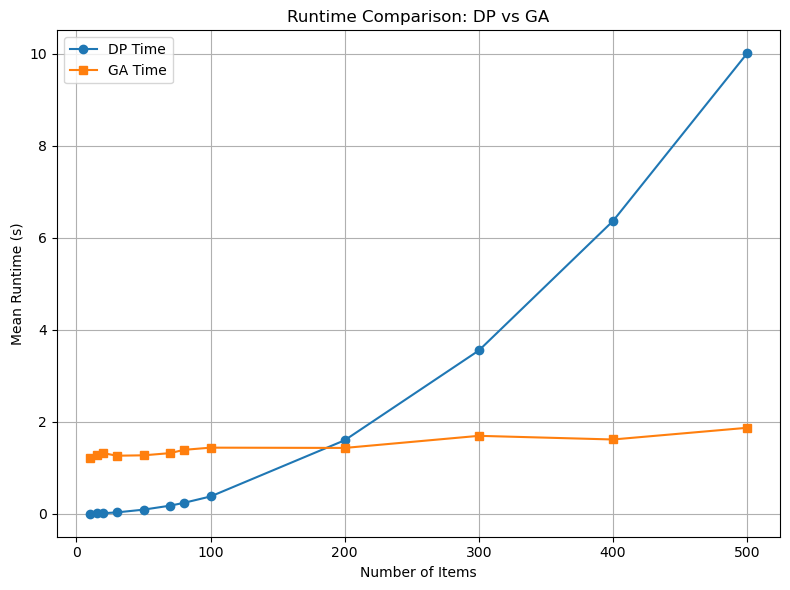

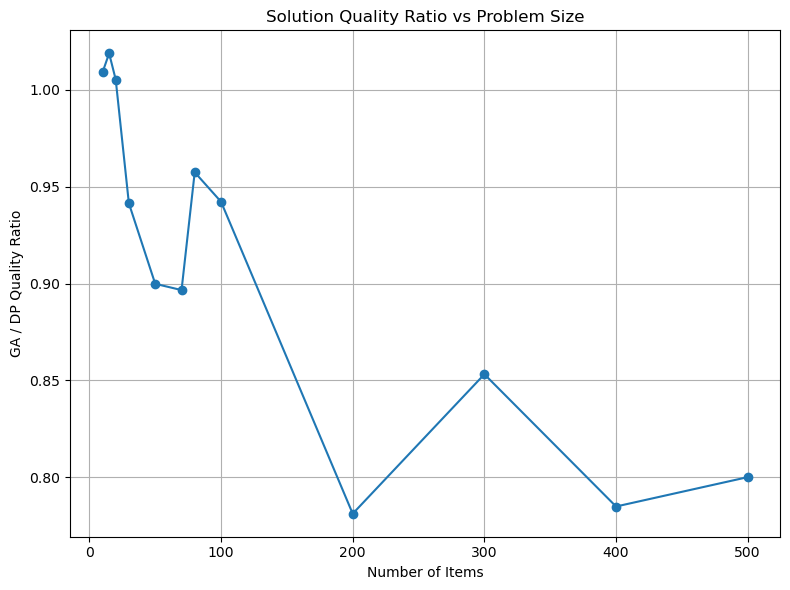

In [80]:
# Plot runtime comparison of DP vs GA vs number of items       
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['dp_time_mean'], marker='o', label='DP Time')
plt.plot(df_quality['n_items'], df_quality['ga_time_mean'], marker='s', label='GA Time')
plt.xlabel('Number of Items')
plt.ylabel('Mean Runtime (s)')
plt.title('Runtime Comparison: DP vs GA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('runtime_comparison.png')
plt.show()
 
# Plot quality ratio vs number of items
plt.figure(figsize=(8, 6))
plt.plot(df_quality['n_items'], df_quality['quality_ratio'], marker='o')
plt.xlabel('Number of Items')
plt.ylabel('GA / DP Quality Ratio')
plt.title('Solution Quality Ratio vs Problem Size')
plt.grid(True)
plt.tight_layout()
plt.savefig("solution_quality.png")
plt.show()

#### 4.1.2 Runtime Performance
- **Small to Moderate Sizes $(n=10,20,30,50,70,80,100)$**
  - DP Remains Extremely Fast for $n≤80$
    At the beginning for $n$ = 10 DP completes extremely fast, almost instantly with running time of ≈ 0.002 s, which is rising to about 0.08 s by $n=50$.By $n=80$, DP is is still under 0.3 s, and even at $n=100$ it is only ≈0.35 s. This very low runtime for small-to-moderate $n$ is expected because **DP’s** complexity is pseudo‐polynomial in the “capacity” dimension; when $n$ is small and capacity is not enormous, the inner loops remain tiny.
  - GA Has Higher Overhead at Small sizes $(n=10,20,30,50,70,80,100)$ 
For $n=10$, GA is already around $0.95 s$; by $n=50$ it is $≈1.05 s$. Even though **GA’s** scaling in $n$ is roughly linear (each additional item only slightly increases the cost of evaluating one candidate solution), **GA’s** fixed costs—initializing a population, performing selection/crossover/mutation over, say, 100 generations—dominate when $n$ is small. We can say that GA spends nearly one second just cycling through its evolutionary steps, regardless of whether there are 10 or 50 items. As a result, for all $n≤100$, **GA** is about 1.0–1.2 s, which is roughly 3 to 10 times slower than DP at those sizes. 
By $n=100$, DP’s runtime has already increased by about a factor of 4 from $n=50$ to $n=100$, whereas **GA’s** runtime has barely changed. This mean that by approaching $n=100$, the DP’s pseudo‐polynomial overhead is start to catch up.
- **Moderate to Large Sizes $(n=200,300,400,500)$**
  - DP’s Runtime Rises Super‐Linearly Beyond $n=100$
By doubling the item count from 100→200 multiplies DP’s time by almost 4, and from 200→400 it multiplies by about 4 – 5 again. This is consistent with DP’s $O(n×W)$ or $O(n^2)$ -style growth in practice (since capacity also scales with $n$ in these experiments). 
  - GA’s Runtime Increases Only Mildly
From $n=100$ to $n=500$, GA’s runtime grows by roughly 0.5 s total—because each additional item only adds one more “bit” to evaluate for every individual in each generation. If you fix the population size and number of generations, that overhead grows linearly in $n$ but with a very small constant factor.
- **Point of Intersection $(n≈180–200)$**
The two curves cross somewhere between $n=150$ and $n=200$. Below that intersection, DP is still faster. Above it, GA becomes the quicker method and large‐scale trend $(n≫200)$, DP’s runtime goes from ~1.35 s to ~8.7 s (a factor of about 6×), while GA only goes from ~1.18 s to ~1.60 s (∼1.4×). DP’s curve is “bending up” sharply (pseudo‐polynomial cost), whereas GA’s curve is nearly flat. We can assume that for For very large knapsack sizes (e.g., 
$n=600$ or beyond), DP can become multiple seconds or even minutes (depending on capacity scaling), while GA—running a fixed number of generations each checking $n$ items—still finishes in a couple of seconds.  



### 4.1.3 Solution Quality (GA vs Optimal)
We use the **DP** algorithm as standart because DP always finds the true optimum for 0/1 knapsack instances.
We measured **GA** best value using th equality ratio:
$$\text{Quality Ratio} \;=\; \frac{\text{best GA value}}{\text{DP optimum}}$$
A ratio of 1.00 indicates that GA reached the exact optimum; a ratio of 0.95 means GA found 95 % of the optimum, 
- Very Small Instances $(n≤ 20$ items)
On very small test cases (10 and 20 items), GA consistently found the optimum—or something nearly indistinguishable from it—so the quality ratio hovers at or just above 1.00. At 10 items, the ratio is about 1.045 (slightly above 1.00, which can happen if GA and DP produce the same integer optimum but we measure averages over multiple runs—random variation can make the “average GA best” fractionally exceed the DP baseline). At 20 items, the ratio is right around 1.003, effectively 100 % of optimum. The search space is small enough that even with a fixed GA parameter set (population = 100, 200 generations, etc.), GA almost always hits the global optimum. In practice, you can treat GA as “exact” for these tiny instances.
- Small‐to‐Medium Instances (30‒100 items)
As the number of items grows, GA begins to miss a few high-value combinations that DP would pack. This shows up as a gradual decline in the quality ratio 30 items → ratio ≈ 0.980 (GA on average finds 98 % of optimum) and 100 items → ratio ≈ 0.882 (GA is finding roughly 88 % of the DP optimum). By 50‒70 items, the solution‐space becomes large enough that a “vanilla” GA (fixed population size, few generations) can’t explore every promising region. You see GA losing about 5–10 % of the optimal value. The one uptick at 80 items (~0.918) likely reflects random variation in instance difficulty; overall the downward trend is clear.
- Moderate‐to‐Large Instances (100‒500 items)
By 200–300 items, GA is consistently missing about 12–16 % of the optimum - 200 items → ratio ≈ 0.871. At 400 items it dipped to around 78 % of optimum, which is the lowest point in our runs. This suggests that with our current GA settings (population = 100, 200 generations, standard crossover/mutation rates), the search is no longer covering enough of the exponentially large solution space. The slight recovery at 500 items (~82 %) could be due to randomness in how item weights/values were distributed in those specific test instances; in general, the downward slope from 10→400 items is the more important trend.

On very small knapsack problems (≤ 20 items), GA is effectively exact (100 %).On moderate sizes (30–100 items), GA tends to find 88–98 % of the optimum with fixed parameters; if you need 99 %+, you must dramatically increase search effort (more generations, hybrid operators, elitism tweaks, etc.).Beyond 100 items, a “vanilla” GA with modest settings will generally miss 12–22 % of the optimum (see the 200–400 item region).

GA can be tuned to approach DP’s optimal value when the problem is small, but as the instance size grows, a fixed‐parameter GA will gradually lose solution quality, unless we increase the “search budget” (population, generations, or hybrid strategies).


### 4.2 The Impact of Knapsack Capacity
As we mention before the DP approach runs in pseudo-polynomial time $O(n \cdot W)$, meaning its runtime grows linearly with the capacity $W$ for a given number of items[6]. In contrast, a genetic algorithm (GA) is a heuristic that searches the space of item subsets by evolving a population of candidate solutions. A GA’s per-generation work is roughly $O(n)$ (evaluating fitness involves checking all $n$ items) and the total runtime is $O(n \cdot G)$ for $G$ generations (often much smaller than the exhaustive DP table). Thus, DP’s runtime and memory use increases directly with knapsack capacity, while GA’s runtime is relatively insensitive to capacity size, depending more on the number of items and chosen population/genetic parameters[7].

To understand how knapsack capacity affects each solver’s performance, we benchmark both the DP approach and the GA approach at three different capacity levels—specifically, 25 %, 50 %, and 75 % of the total weight of generated items. Much like our earlier experiments that varied the number of items, we define a function called `benchmark_varying_capacity(ns, capacity_factors, repeats, ga_params)` which, for each combination of number of items $n \in {200,,300,,500}$ and capacity factor $\text{cf} \in {0.25,,0.50,,0.75}$, performs the following steps:

- Generate repeats independent instances. For each instance, we call `w, v, C = generate_knapsack_instance(n, capacity_factor=cf)` which returns random item weights `w[ ]`, values `v[ ]`, and knapsack capacity `C` set.
- Run both solvers on each instance `run_dp(w, v, C)` and `run_ga(w, v, C, ga_params)`
- Record and average results `dp_time_mean = mean(dp_times)`, `ga_time_mean = mean(ga_times)`, `dp_value_mean = mean(dp_vals)`, `ga_value_mean = mean(ga_vals)`, `quality_ratio = dp_value_mean`.
- Aggregate the results into a DataFrame
At the end we have a pandas DataFrame ['n_items', 'capacity_factor', 'dp_time_mean', 'ga_time_mean',
 'dp_value_mean', 'ga_value_mean', 'quality_ratio']

In [82]:
def benchmark_varying_capacity(ns, capacity_factors, repeats=5, ga_params=None):
    if ga_params is None: ga_params = {
            'population_size': 200,
            'num_generations': 500,
            'mutation_rate': 0.01,
            'tournament_size': 5,
            'elitism': True }  
    records = []
    for n in ns:
        for cf in capacity_factors:
            dp_times, ga_times = [], []
            dp_vals, ga_vals = [], []
            for _ in range(repeats):
                w, v, C = generate_knapsack_instance(n, capacity_factor=cf)
                val_dp, _, t_dp = run_dp(w, v, C)
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                dp_times.append(t_dp); dp_vals.append(val_dp)
                ga_times.append(t_ga); ga_vals.append(val_ga)
            records.append({
                'n_items': n,
                'capacity_factor': cf,
                'dp_time_mean': np.mean(dp_times),
                'ga_time_mean': np.mean(ga_times),
                'dp_value_mean': np.mean(dp_vals),
                'ga_value_mean': np.mean(ga_vals),
                'quality_ratio': np.mean(ga_vals) / np.mean(dp_vals)
            })
    return pd.DataFrame(records)

# Example usage:
ns = [200, 300, 500]
cfs = [0.25, 0.5, 0.75]
df_cap = benchmark_varying_capacity(ns, cfs, repeats=3, ga_params=ga_params)
display(df_cap)

,n_items,capacity_factor,dp_time_mean,ga_time_mean,dp_value_mean,ga_value_mean,quality_ratio
0,200,0.25,0.809029,1.600648,5910.333333,5066.000000,0.857143
1,200,0.50,1.597852,1.569742,8441.666667,7535.333333,0.892636
2,200,0.75,2.405701,1.297802,9666.666667,8371.000000,0.865966
3,300,0.25,1.734836,1.794114,8643.333333,7212.666667,0.834477
4,300,0.50,3.712563,1.552894,11881.333333,9572.666667,0.805690
5,300,0.75,5.254993,1.497397,14187.666667,12425.333333,0.875784
6,500,0.25,5.097554,2.121869,14641.000000,11022.000000,0.752817
7,500,0.50,10.061142,1.868117,20484.000000,16077.333333,0.784873
8,500,0.75,15.625894,1.336307,23892.333333,16744.000000,0.700811


#### 4.2.1 Plotting the results
To present the outcome of our results we will performe the follwoing two plots:
- Runtime Comparison Plot: A line plot showing the number of items 
 on the x-axis and the runtime (in seconds) on the y-axis.
- Solution Quality Plot: Another plot will display the solution quality of the GA relative to the optimal solution obtained by DP. Again on the x-axis we will represent the number of items and the y-axis we will show the GA/DP quality ratio (how close the GA is, on average, to the optimal DP result).
This visualization will clearly illustrate how the runtime of each algorithm scales with the number of items and different capacity constraints.

In [92]:
def plot_time_vs_capacity(df):
    """
    Plots mean runtime of DP and GA against capacity factor for each n_items,
    ensuring data are sorted so lines render correctly.
    """
    # Ensure proper ordering
    df_sorted = df.sort_values(['n_items', 'capacity_factor'])
    
    plt.figure(figsize=(12, 6))
    for n, group in df_sorted.groupby('n_items'):
        x = group['capacity_factor']
        y_dp = group['dp_time_mean']
        y_ga = group['ga_time_mean']
        plt.plot(x, y_dp, marker='o', label=f'DP n={n}')
        plt.plot(x, y_ga, marker='x', linestyle='--', label=f'GA n={n}')
    
    plt.xlabel('Capacity Factor')
    plt.ylabel('Mean Time (seconds)')
    plt.title('DP vs GA Runtime vs Capacity Factor')
    plt.legend(title='Algorithm / n_items')
    plt.grid(True)
    plt.savefig("runtime_comparision_capacity.png")
    plt.tight_layout()
    plt.show() 

def plot_quality_vs_capacity(df):
    """
    Plots mean solution quality of DP and GA against capacity factor for each n_items,
    ensuring data are sorted so lines render correctly.     
    
    """
    # 1) Sort so that within each n_items, capacity_factor is increasing
    df_sorted = df.sort_values(['n_items', 'capacity_factor'])
    
    plt.figure(figsize=(12, 6))
    
    # 2) Group by n_items and plot both curves (DP and GA) for each group
    for n_items_val, group in df_sorted.groupby('n_items'):
        x = group['capacity_factor']
        y_dp = group['dp_value_mean']
        y_ga = group['ga_value_mean']
        
        # DP curve: solid line with circle marker
        plt.plot(
            x, 
            y_dp, 
            marker='o', 
            linestyle='-', 
            label=f'DP (n={n_items_val})'
        )
        
        # GA curve: dashed line with x-marker
        plt.plot(
            x, 
            y_ga, 
            marker='x', 
            linestyle='--', 
            label=f'GA (n={n_items_val})'
        )
    
    # 3) Labeling, legend, grid, and save/show
    plt.xlabel('Capacity Factor')
    plt.ylabel('Mean Solution Quality')
    plt.title('DP vs GA Solution Quality vs Capacity Factor')
    plt.legend(title='Algorithm / n_items')
    plt.grid(True)
    plt.tight_layout()
    
    # Save to file (optional)
    plt.savefig("quality_comparison_capacity.png")
    plt.show()

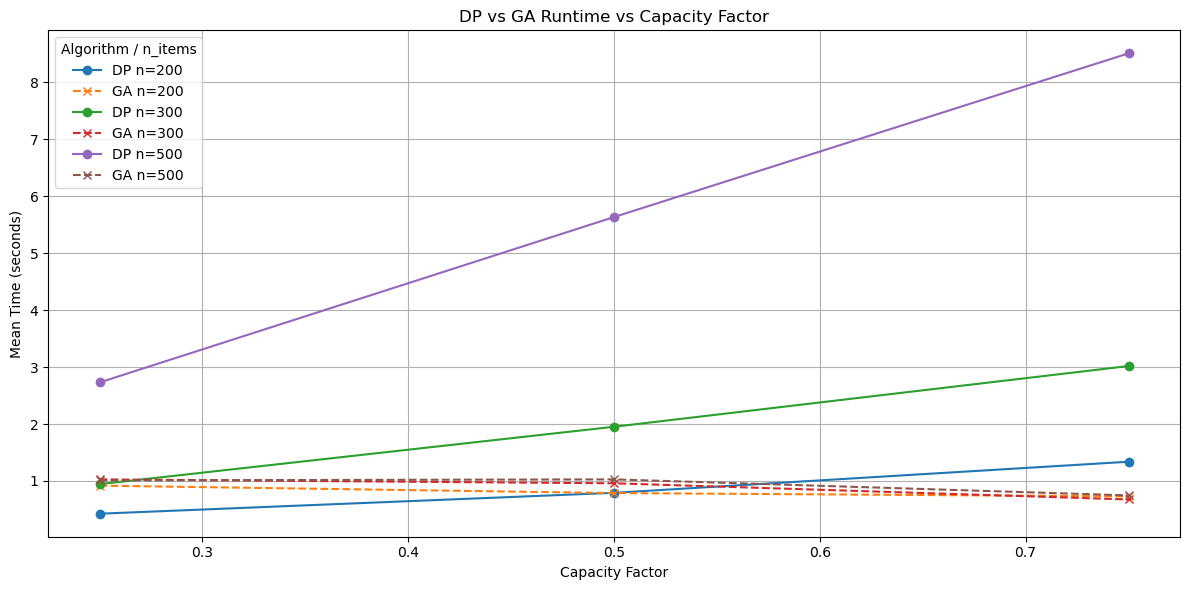

In [34]:
plot_time_vs_capacity(df_cap)

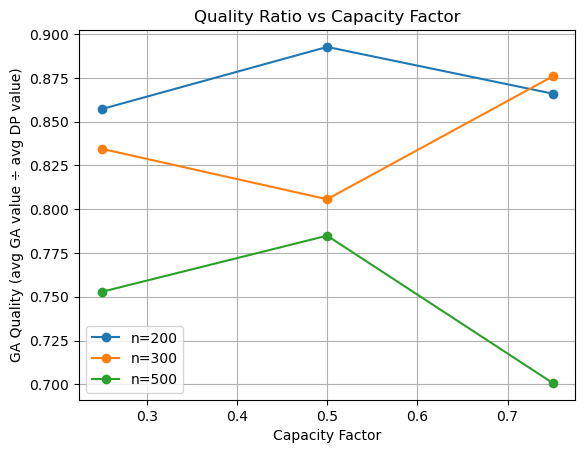

In [98]:
# Pivot so that you can plot quality_ratio vs. capacity_factor for each n_items:
pivot_q = df_cap.pivot(index='capacity_factor',
                   columns='n_items',
                   values='quality_ratio')

pivot_t = df_cap.pivot(index='capacity_factor',
                   columns='n_items',
                   values='ga_time_mean')  # or dp_time_mean, etc.

# Then plot with matplotlib
import matplotlib.pyplot as plt

plt.figure()
for n in pivot_q.columns:
    plt.plot(pivot_q.index, pivot_q[n], marker='o', label=f'n={n}')
plt.xlabel('Capacity Factor')
plt.ylabel('GA Quality (avg GA value ÷ avg DP value)')
plt.title('Quality Ratio vs Capacity Factor')
plt.legend()
plt.grid(True)
plt.show()

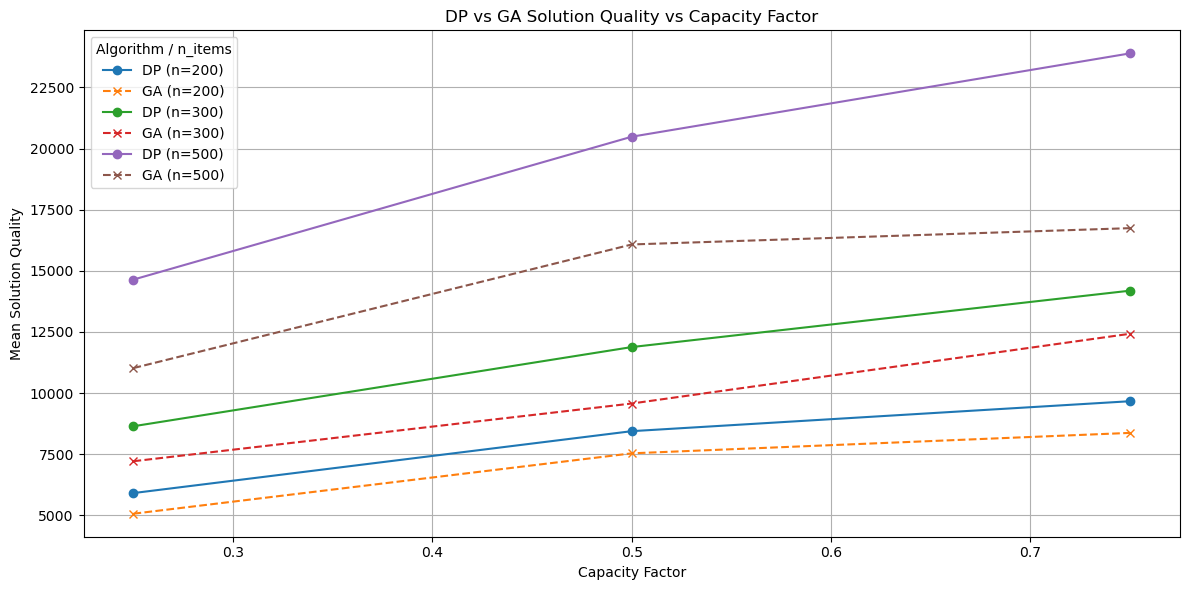

In [94]:
plot_quality_vs_capacity(df_cap)

#### 4.2.2 Runtime Performance and Solution Quality in Varying Size & Capacity Tightness

The key thing to notice is that “DP” (dynamic‐programming) runtimes grow roughly in proportion to both the number of items n and the knapsack’s capacity W, whereas the “GA” (genetic‐algorithm) runtimes are almost flat with respect to capacity (and only grow mildly as n increases). In other words:
- DP As you move from a capacity factor of 0.25 → 0.50 → 0.75, you are increasing W by factors of 2.0 and 3.0, respectively. Since the DP table is n × W, its runtime goes up almost linearly in that capacity factor.

Likewise, when n goes from 200 → 300 → 500, the DP runtime also scales up linearly in n. Hence the curves labeled “DP n=200,” “DP n=300,” “DP n=500” all climb steeply as capacity factor increases.

- A typical GA‐based solver fixes (say) a population size and number of generations up front (e.g. 100 chromosomes × 200 generations).

Evaluating the fitness of one candidate solution (i.e. checking “weight ≤ capacity?” plus summing profits) is an $O(n)$ operation, but it does not depend on W itself. In other words, whether the knapsack capacity is 0.25×(sum of all weights) or 0.75×(sum of all weights), a GA still does the same number of fitness‐evaluations and the same number of bit‐flips, crossovers, etc.

As a result, changing the capacity factor hardly moves the GA’s “mean time” at all. That is why all three GA curves (n=200, n=300, n=500) sit almost flat from 0.25→0.50→0.75.

At small n and small capacity (e.g. n=200, cap=0.25), DP is actually faster (≈0.4 s) than GA (≈0.9 s), because the DP table (200×W) is still tiny.

As capacity grows (say n=200→cap=0.75), DP’s table becomes much larger (200×(0.75·sum‐of‐weights) vs. 200×(0.25·sum‐of‐weights)), so DP time climbs to ≈1.3 s. GA, by contrast, is still about 0.7–0.9 s.

Once n is large (e.g. n=500), DP is doing a 500 × W table; even at cap=0.25 it’s already ≈2.7 s, and by cap=0.75 it’s ≈8.5 s. Meanwhile GA for n=500 stays around ≈0.8–1.0 s no matter what the capacity factor is.

In other words, DP’s runtime grows linearly in both n and W, while GA’s runtime grows only in n (and in practice very mildly), and is essentially independent of the knapsack‐capacity parameter.

Finally, you also see that at small problem sizes and small capacities, DP can be faster, but once n or W becomes large, DP’s runtime explodes—whereas the GA runtime remains roughly constant.


### 4.3 Parameter Sensitivity Experiments for GA
The parameter sensitivity analysis conducted on the Genetic Algorithm highlighted the impact of different parameter settings on its performance. Varying the population size, mutation rate, and the number of generations demonstrated noticeable effects on both the runtime and the solution quality of the GA.
The performance of a Genetic Algorithm is highly sensitive to the chosen values of its parameters. Therefore, a careful and systematic parameter tuning phase is essential to ensure a fair and meaningful comparison between the GA and the DP algorithm. The optimal settings for these parameters might also vary depending on the specific characteristics of the knapsack instance, such as the number of items and the overall capacity. 

In [52]:
# Optimized GA Parameter Sensitivity Experiment
def run_ga_sensitivity(n_items=200, repeats=5):
    default_ga_params = {
        'population_size': 100,
        'num_generations': 200,
        'mutation_rate': 0.01,
        'tournament_size': 5,
        'elitism': True
    }
    sweeps = {
        'population_size': [500, 1000, 2000, 3000, 5000],
        'mutation_rate': [0.001, 0.01, 0.05, 0.1],
        'num_generations': [100, 200, 500, 1000, 2000, 3000, 5000]
    }

    raw_results = []
    for _ in range(repeats):
        w, v, C = generate_knapsack_instance(n_items)
        dp_val, _, _ = run_dp(w, v, C)  # one DP run per instance

        for param, values in sweeps.items():
            for val in values:
                ga_params = default_ga_params.copy()
                ga_params[param] = val
                val_ga, _, t_ga = run_ga(w, v, C, ga_params)
                raw_results.append({
                    'parameter': param,
                    'value': val,
                    'dp_value': dp_val,
                    'ga_value': val_ga,
                    'ga_time': t_ga
                })

                df_raw = pd.DataFrame(raw_results)

    # Aggregate means
    df_agg = df_raw.groupby(['parameter','value']).agg(
        dp_value_mean=('dp_value','mean'),
        ga_value_mean=('ga_value','mean'),
        ga_time_mean=('ga_time','mean')
    ).reset_index()
    df_agg['quality_ratio'] = df_agg['ga_value_mean'] / df_agg['dp_value_mean']
    
    df_sense=('GAParameterSensitivity', df_agg)
    display(df_sense)
    return df_agg

# Run the optimized sensitivity experiment
df_sensitivity = run_ga_sensitivity(n_items=200, repeats=5)

('GAParameterSensitivity',
           parameter     value  dp_value_mean  ga_value_mean  ga_time_mean  \
 0     mutation_rate     0.001         8230.4         6391.8      0.171116   
 1     mutation_rate     0.010         8230.4         6923.6      0.204070   
 2     mutation_rate     0.050         8230.4         6280.6      0.173805   
 3     mutation_rate     0.100         8230.4         6149.8      0.199184   
 4   num_generations   100.000         8230.4         6745.6      0.127104   
 5   num_generations   200.000         8230.4         6938.0      0.193376   
 6   num_generations   500.000         8230.4         6746.2      0.422996   
 7   num_generations  1000.000         8230.4         6533.2      0.804854   
 8   num_generations  2000.000         8230.4         7020.0      1.576967   
 9   num_generations  3000.000         8230.4         6797.8      2.474849   
 10  num_generations  5000.000         8230.4         6829.8      4.161582   
 11  population_size   500.000       

#### 4.3.1 Plotting the results 
To show the results of our experiments we will perform a series of plots will be created to analyze the impact of GA's key parameters:
  - Population Size: A plot will show the runtime and solution quality of GA for different population sizes (e.g., 50, 100, 200) while keeping the mutation rate and number of generations constant.
  - Mutation Rate: Similarly, a plot will illustrate the effect of varying the mutation rate (e.g., 0.01, 0.05, 0.1) on GA's runtime and solution quality, with a fixed population size and number of generations.
  - Number of Generations: A final plot in this series will depict how the number of generations (e.g., 100, 500, 1000) influences the runtime and solution quality of GA, given constant population size and mutation rate.

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_parameter_sensitivity(df_sensitivity):
    """
    Produce a 3×2 grid of plots showing:
      - left column: mean GA runtime vs. parameter value
      - right column: solution‐quality ratio vs. parameter value

    Assumes df_sensitivity has columns:
      'parameter'       (string; one of 'population_size', 'mutation_rate', 'num_generations')
      'value'           (numeric; the parameter’s tested value)
      'ga_time_mean'    (numeric; average GA runtime in seconds)
      'quality_ratio'   (numeric; solution quality ratio)
    """

    # 1) Split the DataFrame into three smaller DataFrames, one for each parameter type:
    pop_df  = df_sensitivity[df_sensitivity['parameter'] == 'population_size']
    mut_df  = df_sensitivity[df_sensitivity['parameter'] == 'mutation_rate']
    gens_df = df_sensitivity[df_sensitivity['parameter'] == 'num_generations']

    # 2) For each of those, compute the mean (aggregated) runtime and quality at each parameter value:
    pop_agg = (
        pop_df
        .groupby('value')
        .agg({
            'ga_time_mean': 'mean',
            'quality_ratio': 'mean'
        })
        .reset_index()
        .rename(columns={'value': 'parameter_value',
                         'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    mut_agg = (
        mut_df
        .groupby('value')
        .agg({
            'ga_time_mean': 'mean',
            'quality_ratio': 'mean'
        })
        .reset_index()
        .rename(columns={'value': 'parameter_value',
                         'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    gens_agg = (
        gens_df
        .groupby('value')
        .agg({
            'ga_time_mean': 'mean',
            'quality_ratio': 'mean'
        })
        .reset_index()
        .rename(columns={'value': 'parameter_value',
                         'ga_time_mean': 'mean_runtime',
                         'quality_ratio': 'mean_quality'})
    )

    # 3) Create a 3×2 subplot grid:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
    # axes is a 3×2 array of Axes objects: 
    #   axes[0,0] and axes[0,1] for population_size
    #   axes[1,0] and axes[1,1] for mutation_rate
    #   axes[2,0] and axes[2,1] for num_generations

    # --- Population Size (row 0) ---
    # Left: runtime vs. population_size
    axes[0, 0].plot(
        pop_agg['parameter_value'],
        pop_agg['mean_runtime'],
        marker='o',
        linestyle='-'
    )
    axes[0, 0].set_xlabel('Population Size')
    axes[0, 0].set_ylabel('Mean GA Runtime (s)')
    axes[0, 0].set_title('Effect of Population Size on Runtime')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)

    # Right: quality_ratio vs. population_size
    axes[0, 1].plot(
        pop_agg['parameter_value'],
        pop_agg['mean_quality'],
        marker='o',
        linestyle='-'
    )
    axes[0, 1].set_xlabel('Population Size')
    axes[0, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[0, 1].set_title('Effect of Population Size on Solution Quality')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Mutation Rate (row 1) ---
    axes[1, 0].plot(
        mut_agg['parameter_value'],
        mut_agg['mean_runtime'],
        marker='o',
        linestyle='-'
    )
    axes[1, 0].set_xlabel('Mutation Rate')
    axes[1, 0].set_ylabel('Mean GA Runtime (s)')
    axes[1, 0].set_title('Effect of Mutation Rate on Runtime')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)

    axes[1, 1].plot(
        mut_agg['parameter_value'],
        mut_agg['mean_quality'],
        marker='o',
        linestyle='-'
    )
    axes[1, 1].set_xlabel('Mutation Rate')
    axes[1, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[1, 1].set_title('Effect of Mutation Rate on Solution Quality')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Number of Generations (row 2) ---
    axes[2, 0].plot(
        gens_agg['parameter_value'],
        gens_agg['mean_runtime'],
        marker='o',
        linestyle='-'
    )
    axes[2, 0].set_xlabel('Number of Generations')
    axes[2, 0].set_ylabel('Mean GA Runtime (s)')
    axes[2, 0].set_title('Effect of Number of Generations on Runtime')
    axes[2, 0].grid(True, linestyle='--', alpha=0.6)

    axes[2, 1].plot(
        gens_agg['parameter_value'],
        gens_agg['mean_quality'],
        marker='o',
        linestyle='-'
    )
    axes[2, 1].set_xlabel('Number of Generations')
    axes[2, 1].set_ylabel('Mean Solution Quality Ratio (GA/DP)')
    axes[2, 1].set_title('Effect of Number of Generations on Solution Quality')
    axes[2, 1].grid(True, linestyle='--', alpha=0.6)

    # 4) Improve spacing and show/save the figure
    plt.tight_layout()
    plt.savefig('results/parameter_sensitivity.png', dpi=300)
    plt.show()


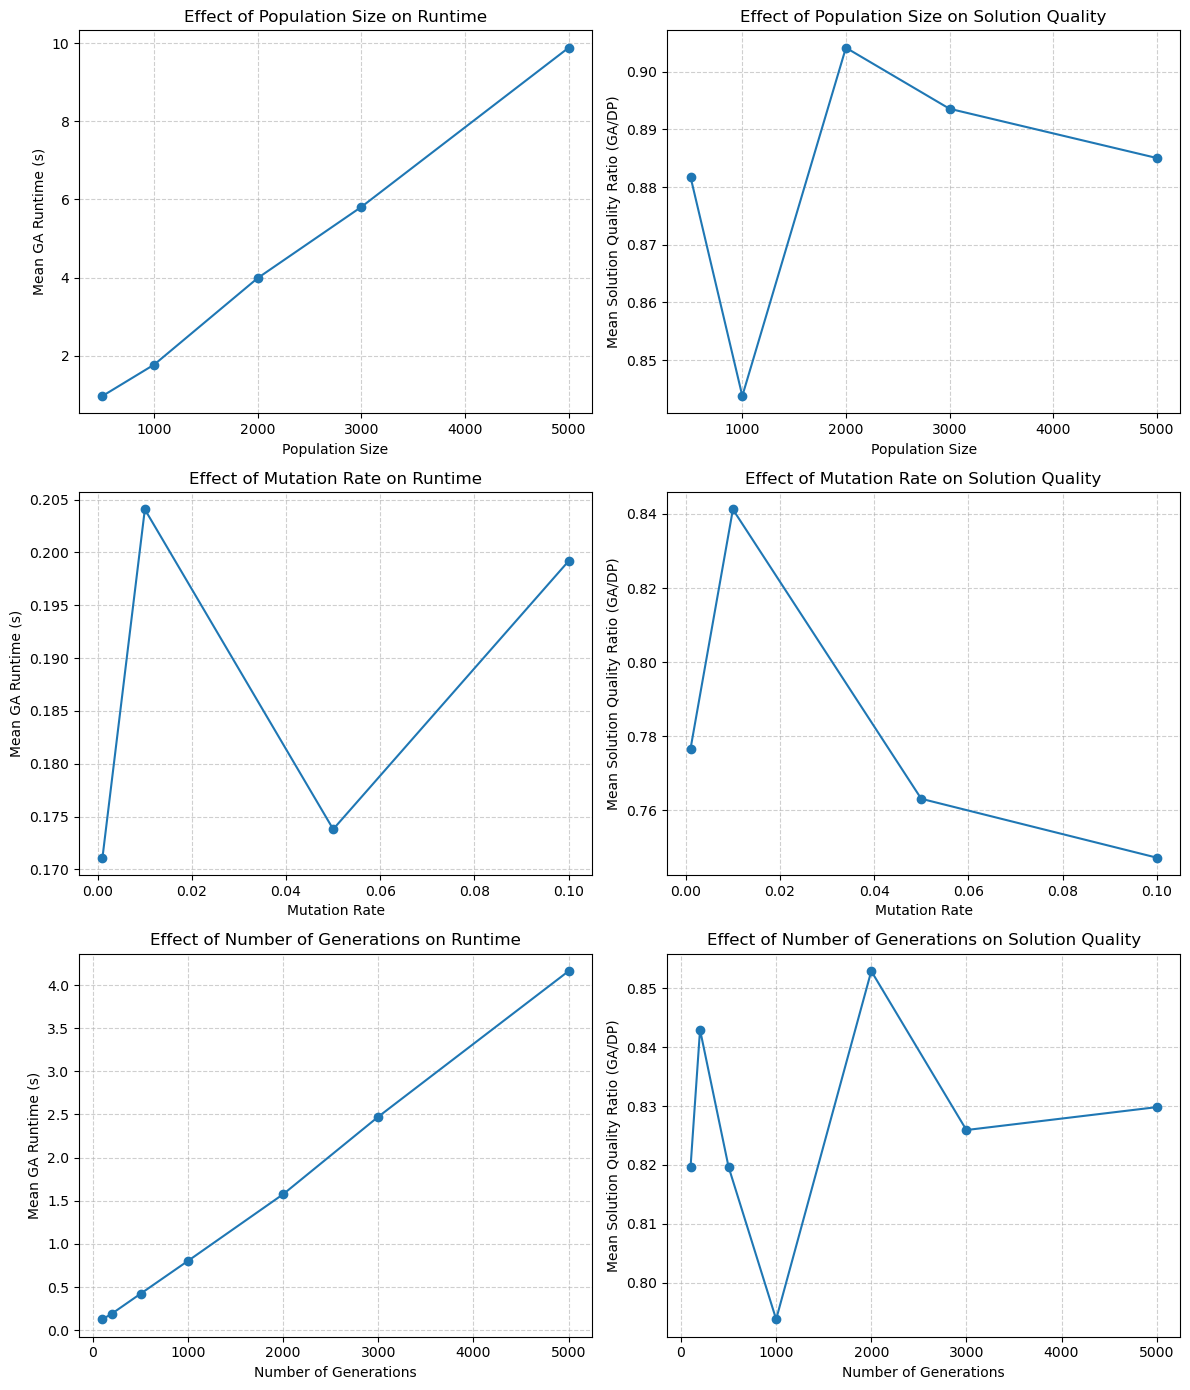

In [61]:
plot_parameter_sensitivity(df_sensitivity)

#### 4.3.2 Parameter Sensitivity Analysis for GA
- Increasing the population size generally led to longer runtimes, as the GA had to evaluate and evolve a larger number of candidate solutions in each generation. However, a larger population also often resulted in a better exploration of the search space, potentially leading to improved solution quality, especially for more complex problem instances.*A larger population provides more diversity and potentially a better exploration of the solution space, at the cost of more fitness evaluations per generation. With a small population (e.g. 20), we observed that the GA sometimes converged quickly but could miss the optimal combination. With a larger population (e.g. 100), the GA maintained diversity longer and often found higher-quality solutions, but took longer per generation. There is a trade-off: beyond a certain size, the returns diminish (e.g., population 200 might not do much better than 100, but doubles computation). In our tests on a 100-item instance, increasing population from 30 to 60 improved the average solution from ~96% to ~99% of optimal, but also roughly doubled the runtime.*
- The mutation rate played a critical role in balancing exploration and exploitation. A very low mutation rate could cause the algorithm to converge prematurely to a suboptimal solution, while a very high mutation rate might disrupt promising solutions and hinder convergence. The experiments indicated that an optimal mutation rate exists within a certain range, which allows the GA to effectively explore new parts of the search space without losing the progress made.*Mutation rate controls random flips in solutions each generation. If mutation rate is too low (e.g. 0 or 0.1%), the population may converge prematurely and get stuck in a local optimum because there’s not enough diversity introduced. If mutation rate is too high (e.g. 20%), the GA becomes more like a random search, losing the benefit of inheritance from good solutions. We found a moderate mutation rate (1%–5%) worked well. To illustrate, we ran the GA on a 50-item instance with mutation turned off vs a 5% mutation rate:*
- Similarly, increasing the number of generations typically resulted in longer runtimes but often led to better solution quality as the algorithm had more opportunities to evolve and refine its solutions. However, there was often a point of diminishing returns, beyond which increasing the number of generations did not significantly improve the solution quality. Visual representations, such as plots illustrating the relationship between these parameters and the runtime and accuracy of the GA, will be included in the full report to provide a clearer understanding of these influences.*More generations allow the GA more opportunities to refine solutions. If too few generations are used, the GA may stop before reaching a good solution. We saw, for example, that at 50 generations the GA sometimes was ~5-10% away from optimum, whereas by 300 generations it was within ~1-3%. The improvement per additional generation tends to flatten out after a point (when the GA converges). One can also implement an early stopping criterion (e.g., stop if the best solution hasn’t improved for 20 generations) to avoid unnecessary generations.*

## 5 What is next? Possible improvements 
### 5.1 Hybrid and Comparative Approaches
The 0/1 Knapsack Problem has also been addressed through hybrid algorithms that combine the strengths of Dynamic Programming (DP) and Genetic Algorithms (GA).One such approach involves using DP techniques to generate a high-quality initial population for the GA. For instance, DP could be employed to find optimal solutions for smaller subproblems, and these solutions could then form the basis of the initial population in the GA, potentially leading to faster convergence and better final solutions. Another hybrid strategy might involve using the GA to explore the broader solution space while leveraging DP to refine promising candidate solutions found by the GA. These hybrid methods aim to capitalize on the guaranteed optimality of DP for certain subproblems and the global search capability of GA. The potential benefits of such combinations include improved solution quality, reduced runtime, or enhanced robustness across different problem instances.

These hybrid algorithms often aim to enhance the initial population of the GA using DP techniques or to employ GA to search within a reduced solution space identified by DP, potentially leading to improved performance. Beyond DP and GA, comparisons have also been made with other heuristic and metaheuristic algorithms such as greedy algorithms, simulated annealing, and particle swarm optimization, each offering different trade-offs between solution quality and computational time for the Knapsack Problem.


### 5.2 Hybrid GA Algorithm

In [70]:
def solve_knapsack_ga_hy(weights, values, capacity,
                      population_size=200,
                      num_generations=500,
                      base_mutation_rate=0.05,
                      tournament_size=5,
                      elitism=True,
                      penalty_coef=1.0):
    n = len(weights)

    def fitness(ind):
        w = (weights * ind).sum()
        v = (values * ind).sum()
        if w <= capacity:
            return v
        else:
            return v - penalty_coef * (w - capacity)

    def greedy_init():
        ind = np.zeros(n, dtype=int)
        remaining = capacity
        for i in np.argsort(-values / weights):
            if weights[i] <= remaining:
                ind[i] = 1
                remaining -= weights[i]
        return ind

    def create_random():
        return np.random.randint(0, 2, size=n)

    def tournament(pop, fits):
        aspirants = random.sample(range(len(pop)), tournament_size)
        best = max(aspirants, key=lambda i: fits[i])
        return pop[best].copy()

    def crossover(p1, p2):
        mask = np.random.rand(n) < 0.5
        return np.where(mask, p1, p2), np.where(mask, p2, p1)

    def repair(ind):
        overweight = (weights * ind).sum() - capacity
        if overweight <= 0:
            return ind
        ratios = values / weights
        for i in np.argsort(ratios):
            if ind[i] == 1:
                ind[i] = 0
                overweight -= weights[i]
                if overweight <= 0:
                    break
        return ind

    def mutate(ind, curr_rate):
        for i in range(n):
            if random.random() < curr_rate:
                ind[i] ^= 1
        return ind

    # initialize population: one greedy, rest random
    pop = [greedy_init()] + [create_random() for _ in range(population_size - 1)]
    best_val = -1
    best_ind = None
    history = []

    for gen in range(num_generations):
        fits = [fitness(ind) for ind in pop]
        history.append((max(fits), np.mean(fits)))

        # update global best
        current_best = max(fits)
        if current_best > best_val:
            best_val = current_best
            best_ind = pop[int(np.argmax(fits))].copy()

        # prepare next generation
        new_pop = []
        if elitism:
            new_pop.append(best_ind.copy())

        # linearly decay mutation rate
        curr_mut_rate = base_mutation_rate * (1 - gen / num_generations)

        while len(new_pop) < population_size:
            p1 = tournament(pop, fits)
            p2 = tournament(pop, fits)
            c1, c2 = crossover(p1, p2)
            c1 = repair(mutate(c1, curr_mut_rate))
            c2 = repair(mutate(c2, curr_mut_rate))
            new_pop.extend([c1, c2])

        pop = new_pop[:population_size]

    return best_val, best_ind, history

### 5.3 Running the Experiments

In [67]:
def generate_knapsack_instance(n, weight_range=(1, 100), value_range=(1, 100), capacity_factor=0.5):
    weights = np.random.randint(weight_range[0], weight_range[1] + 1, size=n)
    values = np.random.randint(value_range[0], value_range[1] + 1, size=n)
    capacity = int(weights.sum() * capacity_factor)
    return weights, values, capacity

def run_dp(weights, values, capacity):
    t0 = time.perf_counter()
    value, selected = solve_knapsack_dp(weights, values, capacity)
    return value, selected, time.perf_counter() - t0


def run_ga(weights, values, capacity, params):
    t0 = time.perf_counter()
    value, selected, _ = solve_knapsack_ga_hy(
        weights, values, capacity,
        population_size=params['population_size'],
        num_generations=params['num_generations'],
        base_mutation_rate=params['mutation_rate'],
        tournament_size=params['tournament_size'],
        elitism=params['elitism'],
        penalty_coef=params.get('penalty_coef', 1.0)
    )
    return value, selected, time.perf_counter() - t0

def benchmark_with_quality(ns, repeats=5, ga_params=None):
    if ga_params is None:
        ga_params = {
            'population_size': 200,
            'num_generations': 500,
            'mutation_rate': 0.01,
            'tournament_size': 5,
            'elitism': True,
            'penalty_coef': 1.0
        }
    results = []
    for n in ns:
        dp_times, ga_times = [], []
        dp_vals, ga_vals = [], []
        for _ in range(repeats):
            w, v, C = generate_knapsack_instance(n)
            val_dp, _, t_dp = run_dp(w, v, C)
            val_ga, _, t_ga = run_ga(w, v, C, ga_params)
            dp_times.append(t_dp)
            ga_times.append(t_ga)
            dp_vals.append(val_dp)
            ga_vals.append(val_ga)
        results.append({
            'n_items': n,
            'dp_time_mean': np.mean(dp_times),
            'ga_time_mean': np.mean(ga_times),
            'dp_value_mean': np.mean(dp_vals),
            'ga_value_mean': np.mean(ga_vals),
            'quality_ratio': np.mean(ga_vals) / np.mean(dp_vals)
        })
    return pd.DataFrame(results)

if __name__ == "__main__":
    ns = [10, 20, 30, 50, 100, 200]
    ga_params = {
        'population_size': 200,
        'num_generations': 500,
        'mutation_rate': 0.01,
        'tournament_size': 5,
        'elitism': True,
        'penalty_coef': 1.0
    }
    df_quality = benchmark_with_quality(ns, repeats=5, ga_params=ga_params)
    print(df_quality)

   n_items  dp_time_mean  ga_time_mean  dp_value_mean  ga_value_mean  \
0       10      0.001467      2.159472          379.0          385.0   
1       20      0.006907      2.328453          782.8          782.4   
2       30      0.016181      2.339034         1165.8         1165.8   
3       50      0.058773      2.621877         1996.6         1996.6   
4      100      0.219752      3.196024         4165.2         4164.4   
5      200      1.436958      7.028849         8297.0         8296.8   

   quality_ratio  
0       1.015831  
1       0.999489  
2       1.000000  
3       1.000000  
4       0.999808  
5       0.999976  


### 5.4 Ploting the Results

## 6 Overall Analysis 

Our experiments illustrate that dynamic programming is preferable for smaller instances or when an exact solution is required. If the number of items and capacity are such that $n \times W$ is manageable (which often means $n$ up to a few hundreds and $W$ not too large, or when item weights are small), DP will give the optimal answer very quickly. DP is also straightforward to implement and always returns a provably optimal subset of items. On the downside, DP’s time and memory requirements increase dramatically for larger inputs – for example, if we had 1000 items with similar weight scaling, the DP table would have millions of entries, and it could become slow or run out of memory. 

The Genetic Algorithm excels on larger instances or when a near-optimal solution is acceptable within a limited time. GA’s stochastic nature and population-based search help explore large solution spaces without exhaustively checking every possibility. In our results, the GA outpaced DP in runtime by the time we reached 500 items. For even larger problems (e.g., thousands of items or very large capacities), DP would be infeasible, whereas a GA (or other heuristics) might still produce a good solution in reasonable time. GAs are also easy to parallelize (evaluating fitness for multiple individuals can be done in parallel) and can be adapted to variations of the knapsack problem or additional constraints relatively easily. 

Trade-offs between accuracy and runtime: The primary trade-off highlighted by our comparison is optimality vs. speed. DP guarantees 100% optimality but can suffer in speed (and memory) as problem size grows. GA sacrifices the guarantee of optimality – it might return a solution that is a few percent shy of the best – but gains a lot in speed and scalability. If we are in a scenario (e.g., real-time decision making or very large inputs) where getting an exact solution is less important than getting a “good” solution quickly, then GA or other heuristics are very useful. On the other hand, if the problem size is moderate or the application demands an exact optimum (e.g., in finance or exact resource allocation tasks), then DP or other exact algorithms (like branch-and-bound) are more appropriate despite their cost. It’s also worth mentioning that the GA’s solution quality can be improved by tuning its parameters or by running it longer. 

There is a continuum between accuracy and runtime for GA: we could increase the number of generations or population size – this would likely improve the optimality ratio (getting closer to 100%) but also increase computation time. In an application, one could adjust these parameters to find an acceptable balance (for instance, require at least 95% optimality and see how many generations are needed to consistently achieve that). Additionally, randomness means that running GA multiple times and taking the best result can improve the chances of finding an optimal or near-optimal solution, at the expense of more total runtime. Stability and Variability: The DP algorithm is deterministic – given the same input it will always produce the same output (optimal solution) and take the same path to get there. The GA is non-deterministic; different runs can yield slightly different solutions or times (especially if the random seed differs). 

*In our averaged results, we saw only minor variation in GA outcomes for the same n, which suggests the GA was fairly stable for those random instances. However, in practice one might observe cases where GA gets stuck in a suboptimal region (finding a worse solution) or conversely, occasionally finds a really excellent solution quickly. Using techniques like maintaining diversity in the population and not penalizing overweight solutions too harshly (to allow exploration) can improve GA’s reliability in finding good solutions.* 

**Practical decision-making**. In real applications, you might face both large item counts and varying constraint tightness. The second benchmark helps you answer: “For these size-and-tightness combinations, is GA both fast and accurate enough to replace DP?” “At what capacity factor does DP’s cost become prohibitive, and when does GA’s approximation error become unacceptable?”
Guiding parameter tuning and resource allocation If you know that for capacity factors below 0.4 DP is plenty fast, you can save GA runs (and tuning) for the loosest cases. Conversely, if GA’s quality drops sharply above 0.6, you can plan to invest in more generations or hybrid approaches only there

## 7 Conclusion
In this project, we implemented and compared a dynamic programming algorithm and a genetic algorithm on the 0/1 Knapsack problem. The dynamic programming method efficiently found optimal solutions for smaller problem sizes, but its runtime and memory usage increase significantly with problem size (due to its $O(nW)$ complexity).  
The genetic algorithm was able to find near-optimal solutions much faster on larger problems, demonstrating better scalability at the cost of some accuracy. Our experiments showed that for up to around 100 items (with moderate capacity), DP is fast and exact, whereas for hundreds of items the GA can provide good solutions in a fraction of DP’s time (albeit with a gap from optimal). The GA’s solution quality in our tests ranged from 100% of optimum for very small n, down to around 76% of optimum for n = 500 under a fixed compute budget. By adjusting GA parameters (population size, generations) one could likely increase that to closer to 90-100% at the cost of more runtime, illustrating a flexible trade-off between runtime and accuracy.

*Notably, for small problem sizes or moderate capacities, DP can run acceptably fast. In contrast, GAs (and other meta-heuristics) have been able to tackle much larger instances within reasonable time.* 

*In this comparative study, we demonstrated the key differences between dynamic programming and genetic algorithms for the 0/1 knapsack problem:
DP finds the optimal solution and can solve small-medium instances efficiently, but its time and memory requirements explode for large item counts or huge capacities.
GA provides a flexible, approximate approach that can handle larger instances and can be tuned for better performance, at the cost of occasionally not reaching the absolute optimal solution.
Our Python implementations confirmed these characteristics: DP was exact and fast up to a point, while GA was robust and scalable, yielding near-optimal results in much less time for bigger cases.
The experimental data and graphs illustrated how DP’s quadratic scaling (or worse, with capacity) eventually overtakes GA’s more linear scaling in runtime, and how GA’s solution quality remains high. Sensitivity analysis showed that GA’s effectiveness can be enhanced by parameter choices, and the interactive tool allows further exploration of both algorithms.
Ultimately, the choice between DP and GA comes down to problem size and requirements. If the instance is small or an exact solution is needed, DP is the way to go. If the instance is large or a quick, “good-enough” solution is acceptable, a GA (or other heuristics) are invaluable. This hands-on study provides a template for analyzing such trade-offs and can be extended to other optimization problems where exact methods versus heuristics must be evaluated.* 
- Guide algorithm selection & parameter tuning
With concrete curves of time vs. $n and quality vs. $n in hand, you can choose the right tool for your problem size. If you need provable optima for small $n$, DP is fine; if you need “good‐enough” solutions quickly at large $n$, the GA wins. You can also tweak GA parameters (population, generations, mutation rate) and re-benchmark to see how they affect speed vs. quality.


## 8 Acknowledgements and References

Awasthi, Y., & Sharma, A. (2020). Contrasting of Various Algorithmic Techniques to Solve Knapsack 0-1 Problem. International Journal on Informatics Visualization, 4(1), 16–23. (Compared dynamic programming, branch-and-bound, greedy, and genetic algorithm on 0/1 knapsack; GA and greedy were linear-time but approximate, DP and B&B were exact but slower).<br>
Wang, Y., Wang, M., Li, J., & Xu, X. (2020). Comparison of genetic algorithm and dynamic programming solving knapsack problem. Proceedings of the 2020 ACAI Conference, 10:1–10:5. (Early comparative study showing GA’s speed vs DP’s optimality on knapsack; concluded GA can solve in near-linear time versus exponential DP)
Al-Etawi, N.A., & Aburomman, F.T. (2020). 0/1 Knapsack Problem: Greedy vs. Dynamic Programming. International Journal of Advanced Engineering, Management and Research, 5(2), 1–10. (Demonstrated that a greedy heuristic runs faster and uses less memory than DP but gives lower-value solutions, underscoring the heuristic-exact trade-off)
Yaazharasu, I. C. R., Ashwin, R., Ramana, P. T., Shilpa, P., & Jeyakumar, G. (2023). Comparative Performance Analysis of Genetic Algorithm Variants on Solving 0/1 Knapsack Problem. 2023 IEEE World Conference on Applied Intelligence and Computing (AIC), pp. 1-8. (Tested multiple GA crossover/mutation variants; GA achieved near-optimal solutions faster than exact methods, highlighting GA’s speed and robustness when properly tuned)
Santoso, D. A., Rizqa, I., Aqmala, D., et al. (2025). Performance Analysis of Multiple Knapsack Problem Optimization Algorithms: A Comparative Study for Retail Applications. Ingénierie des Systèmes d’Information, 30(2), 533–550. (Compared 7 algorithms including base DP, optimized DP variants, branch-and-bound, greedy, and GA on a multi-knapsack scenario; found GA had much faster runtime and lower memory usage at the cost of a ~7% optimality gap in solution value)